In [ ]:
from k2400ser import *
brad = K2400ser('/dev/ttyUSB0')#, ilimit=1,vlimit=1,function=':SOURCE:FUNCTION VOLTAGE')

In [2]:
import serial, string, time, csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# keith=serial.Serial('/dev/ttyUSB0', baudrate = 57600)

In [1]:
from jvtool import *

In [3]:
def read(self):
    temp_read=str(self.read(self.in_waiting))
    pos_b=temp_read.find("b'")+2
    pos_r=temp_read.find("\\r'")
    
    return temp_read[pos_b:pos_r]
    

In [4]:
def write(self, command):
        self.write(('{0!s}\r'.format(command)).encode())

In [284]:
keith=k2401('\COM4')

In [18]:
keith.write(':SOURCE:FUNCTION CURRENT')

In [19]:
keith.write(':SOUR:CURR:MODE FIXED')

In [39]:
keith.write(':SOUR:CURR:RANG 10E-30')

In [38]:
keith.write(':SOUR:CURR:LEV 50E-12')

In [42]:
keith.write(':SENSE:VOLT:PROTECTION 50E-2')

In [192]:
keith.write(':SENSE:FUNC "VOLT"')

In [186]:
keith.write(':SENSE:VOLT:RANG 10E-2')

In [197]:
keith.write(':FORM:ELEM volt')

In [198]:
keith.write(':OUTPUT ON')

In [199]:
keith.write(':READ?')

In [183]:
keith.write(':OUTPUT OFF')

In [178]:
keith.write(':SENSE:VOLT:PROTECTION:LEVEL?')

In [213]:
keith.read()

''

In [214]:
keith.read()
keith.write(':READ?')
start = time.time()
while keith.dev.in_waiting == 0:
    pass

end = time.time()
print(end-start)
keith.read()
    

0.07811474800109863


'+5.249594E-05'

## Testing sweep a constant current 

In [235]:
keith.write('*RST')

In [241]:
keith.write(':SOURCE:FUNCTION CURRENT')
keith.write(':SOUR:CURR:RANG 10E-15')
keith.write(':SOUR:CURR:LEV 10E-11')

In [258]:
keith.write(':SENSE:VOLT:PROTECTION 50E-2')
keith.write(':SENSE:FUNC "VOLT"')
keith.write(':SENSE:VOLT:RANG 10E-2')
keith.write(':FORM:ELEM volt')

In [295]:
keith.write(':SOUR:CURR:MODE LIST')
keith.write(':SOUR:LIST:CURR 10E-8')
keith.write(':TRIG:COUN 1000')
keith.write(':SOUR:DEL 0.1')


In [296]:
keith.write(':OUTP ON')
keith.write(':READ?')
keith.write(':OUTP OFF')

In [291]:
keith.write(':SOUR:CURR:MODE LIST')
keith.write(':SOUR:LIST:CURR 0E-6')
keith.write(':TRIG:COUN 1000')
keith.write(':SOUR:DEL 0.1')
keith.write(':OUTP ON')
keith.write(':READ?')
keith.write(':OUTP OFF')

In [297]:
temp=''
while True:
    temp=temp+keith.read()

KeyboardInterrupt: 

In [293]:
len(temp.split(','))


1000

In [256]:
V=[float(i) for i in temp.split(',')]


In [294]:
temp2

In [301]:
with open('Vtestseries', 'w', newline='') as csvfile:
    jvwriter = csv.writer(csvfile, delimiter=',',
                        quotechar='|', quoting=csv.QUOTE_MINIMAL)

    v_temp=list(V)
    v_temp.insert(0,'V')
#     i_temp=list(self.i_series)
#     i_temp.insert(0,'I')
    jvwriter.writerow(v_temp)
#     jvwriter.writerow(i_temp)

In [143]:
keith.write(':SENSe:VOLTage:NPLCycles .01')

In [ ]:
write(keith,':SOURCE:VOLTAGE {0!s}'.format(.1))
write(keith,':MEASURE:CURRENT?')
# write(keith,':MEASURE:RAD?')


In [ ]:
write(keith,':OUTPUT ON')

In [ ]:
write(keith,':MEASURE:READ')

In [ ]:
write(keith,':OUTPUT OFF')

In [ ]:
write(keith,':SOUR:VOLT:RANG .15')

In [ ]:
write(keith,':READ?')

In [ ]:
# write(keith,'*RST')
write(keith,':SOUR:FUNC VOLT')
write(keith,':SOUR:VOLT:MODE FIXED')
write(keith,':SOUR:VOLT:RANG 3')
write(keith,':SOUR:VOLT:LEV '+str(1.5))
write(keith,':SENS:CURR:PROT 10E-3')
write(keith,':SENS:FUNC "CURR"')
write(keith,':SENS:CURR:RANG 10E-3')
write(keith,':FORM:ELEM CURR')
write(keith,':OUTPUT ON')
write(keith,':READ?')
write(keith,':OUTPUT OFF')

In [ ]:
read(keith)

In [ ]:
write(keith,':SOUR:VOLT:LEV '+str(0.1211))

In [ ]:
write(keith,':OUTPUT ON')

In [ ]:
write(keith,':READ?')

In [ ]:
write(keith,':MEASURE:CURRENT?')

In [ ]:
Vin=np.linspace(-2,2,100)
Iout=[]
write(keith,':SOUR:FUNC VOLT')
write(keith,':SOUR:VOLT:MODE FIXED')
write(keith,':SOUR:VOLT:RANG .5')
write(keith,':SENS:CURR:PROT 10E-1')
write(keith,':SENS:FUNC "CURR"')
write(keith,':SENS:CURR:RANG 10E-1')
write(keith,':FORM:ELEM CURR')
write(keith,':OUTPut ON')
read(keith)
for v in Vin:
#     print(str(v))
    
    write(keith,':SOUR:VOLT:LEV '+str(v))
#     time.sleep(1)
    write(keith,':READ?')
    time.sleep(.5)
    Iout.append(read(keith))
#     time.sleep(.5)
    
write(keith,':OUTPUT OFF')

In [ ]:
Iout=[float(i) for i in Iout]

Text(0, 0.5, 'Current (A)')

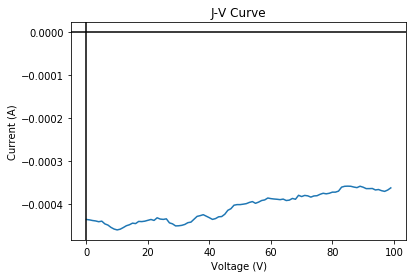

In [257]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('J-V Curve')
ax.plot(V)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (A)')

In [ ]:
Vin[1]/float(Iout[1])

In [ ]:
Vin[0]/float(Iout[0])

In [ ]:
n=5
Vin[n]/float(Iout[n])

In [ ]:

V=list(Vin)
V.insert(0,'V')
V
with open('test.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    
    V=list(Vin)
    V.insert(0,'V')
    I=list(Iout)
    I.insert(0,'I')
    spamwriter.writerow(V)
    spamwriter.writerow(I)



In [ ]:
a=[(Vin[i], Iout[i]) for i in range(len(Iout))]

In [ ]:
temp=list(Vin).insert(0,'V')
temp
a=None

In [ ]:
a=list(Vin)

In [ ]:
a.insert(0,'V')

In [ ]:
a

In [ ]:
c.extend([1, 2])

In [ ]:
d=['Vin']

In [ ]:
d.extend([1, 2])

In [ ]:
d

In [ ]:
Iout.insert(0,'I')

In [ ]:
Iout

In [ ]:
Iout=Iout[1:0]

In [ ]:
a = list(np.linspace(1,10,10))

In [ ]:
a

In [ ]:
a[1:]

In [ ]:
10e-2

In [ ]:
temp

In [ ]:
temp=[]
with open('jv_device1p2.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    print(spamreader)
    for row in spamreader:
         temp.append(row)

In [ ]:
v_series=[float(i) for i in temp[0][1:]]

In [ ]:
i_series=[float(i) for i in temp[1][0:]]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('J-V Curve')
ax.plot(v_series,i_series)
# ax.plot(v_series,i_fit)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (A)')

In [ ]:
_,Isc = np.polyfit(v_series,i_series,1)

In [ ]:
Isc

In [ ]:
i_fit=np.multiply(v_series,m)+b

In [ ]:
_,Voc = np.polyfit(i_series,v_series,1)

In [ ]:
Voc

In [ ]:
product=np.multiply(v_series,i_series)
fourthQ=[]
for p in list(product):
    if p<0:
        fourthQ.append(p)

In [ ]:
abs(min(fourthQ))/abs(Isc*Voc)

In [1]:
from jvtool import *

In [2]:
%matplotlib notebook

Jsc 2.2729045 mA*cm^-2
Voc 0.021955806677589725 V
Fill Factor [0.25177063]


<IPython.core.display.Javascript object>


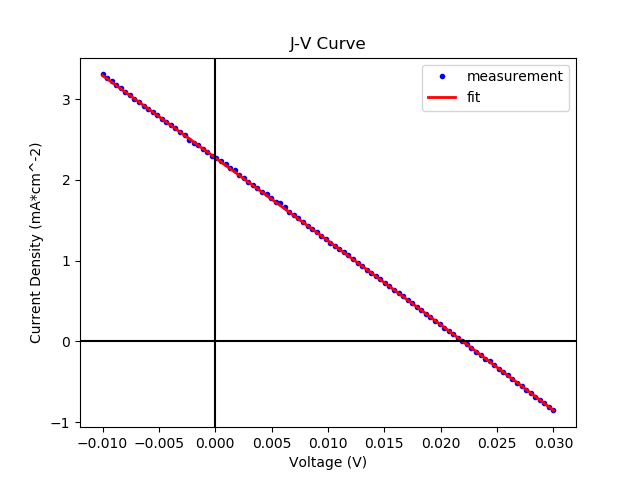

array([0.02905292, 1.        , 0.02000072])

In [3]:
d1p1=analyzer('jv_device1p1.csv',.5)
d1p1.plotJVfit()
d1p1.fitparam

Jsc 14.240015399999999 mA*cm^-2
Voc 0.08060118071191821 V
Fill Factor [0.25148798]


<IPython.core.display.Javascript object>


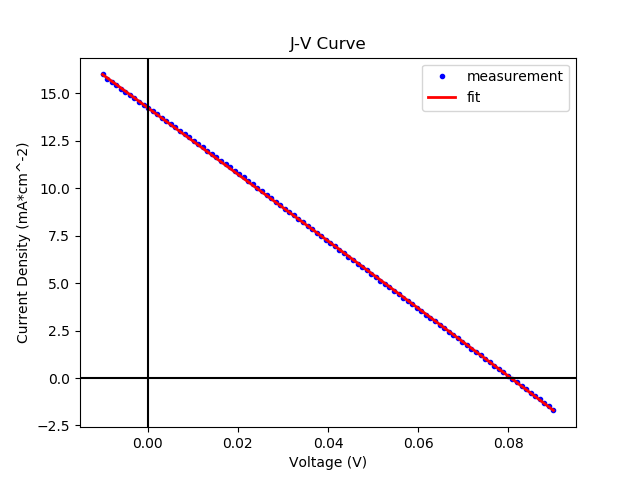

array([0.03384054, 2.        , 0.01151767])

In [4]:
d1p2=analyzer('jv_device1p2.csv',.5)
d1p2.plotJVfit()
d1p2.fitparam

Jsc 2.5728002857142855 mA*cm^-2
Voc 0.019662101783824087 V
Fill Factor [0.25021887]


<IPython.core.display.Javascript object>


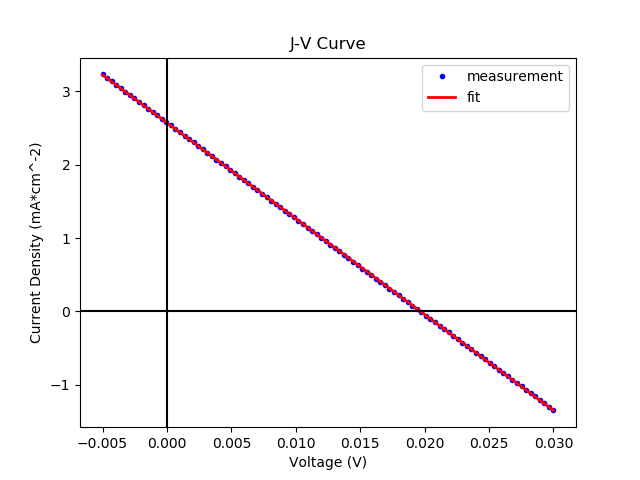

In [17]:
d1p3=analyzer('jv_device1p3.csv',.5)
d1p3.plotJVfit()

Jsc 3.787014 mA*cm^-2
Voc 0.027713939409837976 V
Fill Factor [0.25354626]


<IPython.core.display.Javascript object>


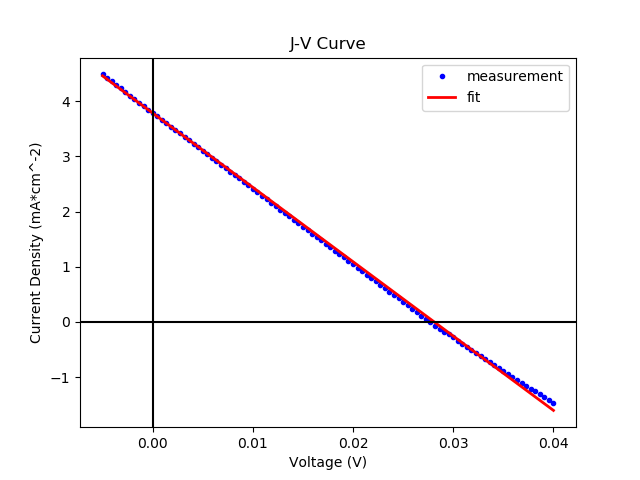

In [7]:
d2p1=analyzer('jv_device2p1.csv',.5)
d2p1.plotJVfit()

Jsc 27.51539 mA*cm^-2
Voc 0.29579120496377753 V
Fill Factor [0.26395066]


<IPython.core.display.Javascript object>


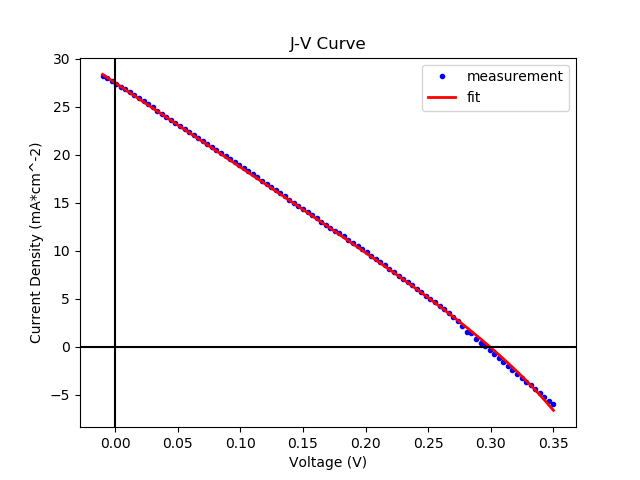

array([0.00203173, 2.        , 0.02282962])

In [6]:
d2p1=analyzer('jv_device2p2on10min.csv',.5)
d2p1.plotJVfit()
d2p1.fitparam

Jsc 5.209962571428572 mA*cm^-2
Voc 0.018976608084653904 V
Fill Factor [0.24975866]


<IPython.core.display.Javascript object>


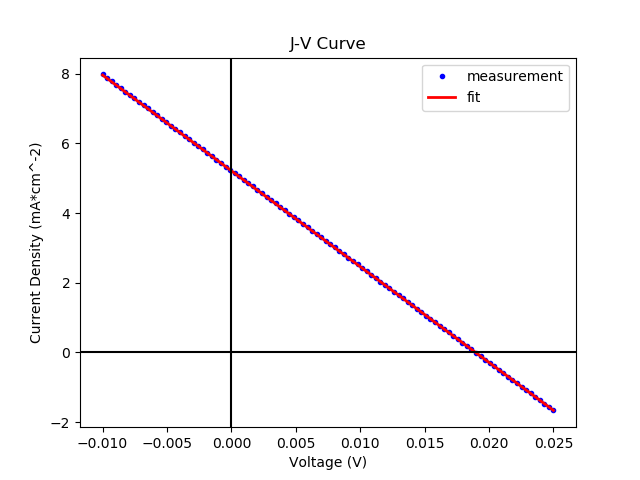

In [15]:
d2p2=analyzer('device3p2.csv',.5)
d2p2.plotJVfit()